# Lab 03

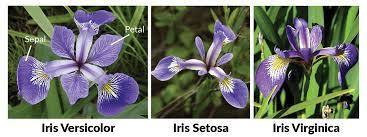



### Bài tập 1

In [1]:
#import thư viện cần thiết
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#load data
from sklearn.datasets import load_iris
iris = load_iris()

#tạo dữ liệu
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(int)

X_new = np.linspace(0, 3, 100).reshape(-1, 1)

X_new.shape


(100, 1)

In [2]:
import numpy as np

# Bước 1: Thêm giá trị bias_term vào vector X ban đầu.
def add_bias(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

# Bước 2: Hàm sigmoid
def sigmoid(X, theta):
    z = np.dot(X, theta)
    return 1 / (1 + np.exp(-z))

# Bước 3: Hàm tính giá trị hàm loss
def compute_loss(y_true, y_hat):
    return -np.mean(y_true * np.log(y_hat) + (1 - y_true) * np.log(1 - y_hat))

# Bước 4: Hàm tính Gradient Descent
def compute_gradient(X, y, y_hat):
    return np.dot(X.T, (y_hat - y)) / len(y)

# Bước 5: Hàm khởi tạo tham số cho w (tham số của mô hình)
def initialize(X):
    num_features = X.shape[1]
    return np.zeros(num_features)

# Bước 6: Hàm fit - Huấn luyện mô hình
def fit(X, y, alpha, iter):
    X = add_bias(X)
    theta = initialize(X)
    
    for i in range(iter):
        z = np.dot(X, theta)
        y_hat = sigmoid(X, theta)
        gradient = compute_gradient(X, y, y_hat)
        theta -= alpha * gradient
        
        loss = compute_loss(y, y_hat)
        if i % 10 == 0:
            print(f'Iteration {i}: Loss = {loss}')
    
    return theta

# Bước 7: Hàm dự đoán
def predict(X_new, theta):
    X_new = add_bias(X_new)
    y_hat_new = sigmoid(X_new, theta)
    y_pred = (y_hat_new >= 0.5).astype(int)
    return y_pred

# Huấn luyện mô hình
theta = fit(X, y, alpha=0.1, iter=100)

# Dự đoán
y_pred = predict(X, theta)

from sklearn.metrics import accuracy_score

# Tính độ chính xác
accuracy = accuracy_score(y, y_pred)

print(f'Độ chính xác: {accuracy * 100:.2f}%')


Iteration 0: Loss = 0.6931471805599454
Iteration 10: Loss = 0.6615691859356774
Iteration 20: Loss = 0.6333731745616493
Iteration 30: Loss = 0.6079673627951524
Iteration 40: Loss = 0.5849927223893011
Iteration 50: Loss = 0.5641657901475443
Iteration 60: Loss = 0.5452416869471637
Iteration 70: Loss = 0.5280045185349878
Iteration 80: Loss = 0.5122636890354471
Iteration 90: Loss = 0.49785135130224506
Độ chính xác: 96.00%


### Bài tập 3

Iteration 0: Loss = 0.6931471805599454
Iteration 10: Loss = 0.6615691859356774
Iteration 20: Loss = 0.6333731745616493
Iteration 30: Loss = 0.6079673627951524
Iteration 40: Loss = 0.5849927223893011
Iteration 50: Loss = 0.5641657901475443
Iteration 60: Loss = 0.5452416869471637
Iteration 70: Loss = 0.5280045185349878
Iteration 80: Loss = 0.5122636890354471
Iteration 90: Loss = 0.49785135130224506


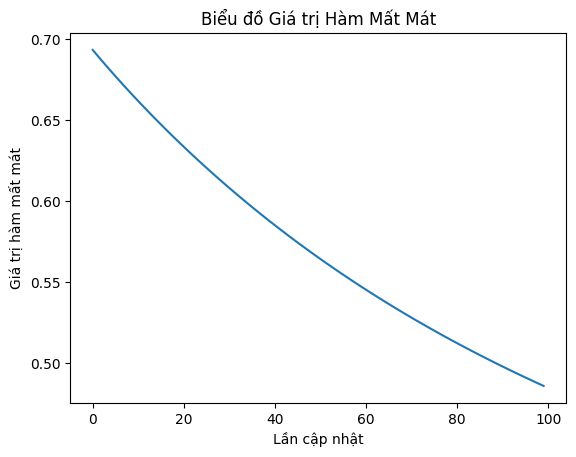

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Bước 1: Thêm giá trị bias_term vào vector X ban đầu.
# Bước 2: Hàm sigmoid
# Bước 3: Hàm tính giá trị hàm loss
# Bước 4: Hàm tính Gradient Descent
# Bước 5: Hàm khởi tạo tham số cho w (tham số của mô hình)
# Bước 6: Hàm fit - Huấn luyện mô hình

def fit(X, y, alpha=0.1, iter=100):
    X = add_bias(X)
    theta = initialize(X)
    losses = []  # Danh sách để lưu giá trị loss sau mỗi lần cập nhật
    
    for i in range(iter):
        y_hat = sigmoid(X, theta)
        gradient = compute_gradient(X, y, y_hat)
        theta -= alpha * gradient
        
        loss = compute_loss(y, y_hat)
        losses.append(loss)
        
        if i % 10 == 0:
            print(f'Iteration {i}: Loss = {loss}')
    
    return theta, losses

# Bước 7: Hàm dự đoán
# Huấn luyện mô hình
theta, losses = fit(X, y, alpha=0.1, iter=100)

# Biểu đồ giá trị hàm mất mát sau mỗi lần cập nhật trọng số
plt.plot(range(len(losses)), losses)
plt.xlabel('Lần cập nhật')
plt.ylabel('Giá trị hàm mất mát')
plt.title('Biểu đồ Giá trị Hàm Mất Mát')
plt.show()


### Bài tập 5

In [6]:
from sklearn.linear_model import LogisticRegression

# Dùng thư viện Logistic Regression để dự đoán x
model = LogisticRegression()
model.fit(X, y)
y_pred_sklearn = model.predict(X)
score_sklearn = accuracy_score(y,y_pred_sklearn)
# Dùng tham số theta từ mô hình tự cài đặt để dự đoán x
y_pred_manual = predict(X, theta)
score_manual = accuracy_score(y,y_pred_manual)

# So sánh kết quả giữa thư viện và tự cài đặt
if np.array_equal(score_manual , score_sklearn):
    print("Kết quả giữa thư viện và tự cài đặt giống nhau.")
else:
    print("Kết quả giữa thư viện và tự cài đặt khác nhau.")
score_sklearn

Kết quả giữa thư viện và tự cài đặt giống nhau.


0.96

### Bài tập 6

In [7]:
# Sử dụng các thuộc tính Petal Length, Sepal Length và Sepal Width
X_custom = iris["data"][:, [0, 1, 2]]

# Huấn luyện mô hình với các thuộc tính mới
theta_custom, losses_custom = fit(X_custom, y, alpha=0.1, iter=100)

# Dự đoán với các thuộc tính mới
y_pred_custom = predict(X_custom, theta_custom)

# Độ chính xác
accuracy_custom = accuracy_score(y, y_pred_custom)
print(f'Độ chính xác với các thuộc tính mới: {accuracy_custom * 100:.2f}%')


Iteration 0: Loss = 0.6931471805599454
Iteration 10: Loss = 0.524219537441583
Iteration 20: Loss = 0.4550368682848337
Iteration 30: Loss = 0.4157631802929675
Iteration 40: Loss = 0.39000307963258846
Iteration 50: Loss = 0.37136350390909
Iteration 60: Loss = 0.35693434955638587
Iteration 70: Loss = 0.34521813853414757
Iteration 80: Loss = 0.33536798978720006
Iteration 90: Loss = 0.3268684204590371
Độ chính xác với các thuộc tính mới: 95.33%
